The point of this notebook is to look at traces of different length and
experiment with different methods of diagnosing them, with the ultimate aim of seeing that they converge properly
Perhaps we will move on to evaluating the traces

In [7]:
import pymc_model as pm
import pymc
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt

Upload different databases, each with its own sample length

In [8]:
s1 = pymc.database.pickle.load('testlength1000.pickle')
s3 = pymc.database.pickle.load('testlength3000.pickle')
s5 = pymc.database.pickle.load('testlength5000.pickle')
s10 = pymc.database.pickle.load('testlength10000.pickle')

Start by comaring the means and standard deviations of each database

In [10]:
for i in [s1, s3, s5, s10]:
    mean = np.mean(i.trace('mass_bal')[:])
    std = np.std(i.trace('mass_bal')[:])
    print(i, mean, std)

<pymc.database.pickle.Database object at 0x7f68f4f982e8> -0.522492727925 0.226317110374
<pymc.database.pickle.Database object at 0x7f68f4f98240> -0.533786170736 0.229247203142
<pymc.database.pickle.Database object at 0x7f68f4f984a8> -0.540335249823 0.246009182266
<pymc.database.pickle.Database object at 0x7f68f4f98940> -0.542129352987 0.238868492805


Use the built in pymc function to look at summary statistics for each variable. 
I was told that MC error should be less than 1% of mean, which is not actually 
a condition that is met even in the 10000 sample

In [46]:
for i in [s1, s3, s5, s10]:
    print(i)
    m = pymc.MCMC(pm, db=i)
    m.summary()


ddfsnow:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.004            0.001            0.0              [ 0.002  0.006]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.002            0.003           0.004          0.005         0.007
	

precfactor:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.956            0.349            0.032            [ 0.392  1.695]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.392            0.724           0.892          1.187         1.739
	

tempchange:
 
	Mean             SD               MC Error        95% HPD interval
	---------

/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/tushar/ana

Use the built in pymc plot function to look at the traces and autocorrelations, and the probability distributions

Plotting ddfsnow
Plotting precfactor
Plotting tempchange
Plotting ddfsnow
Plotting precfactor
Plotting tempchange
Plotting ddfsnow
Plotting precfactor
Plotting tempchange
Plotting ddfsnow
Plotting precfactor
Plotting tempchange


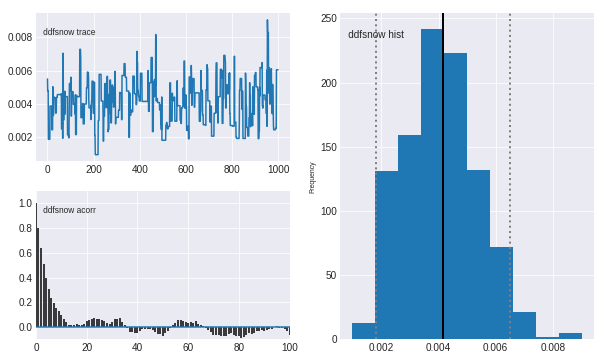

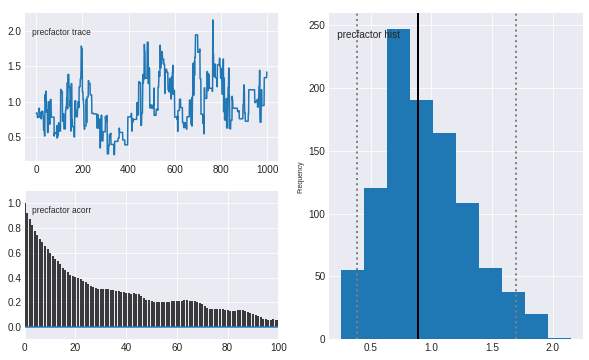

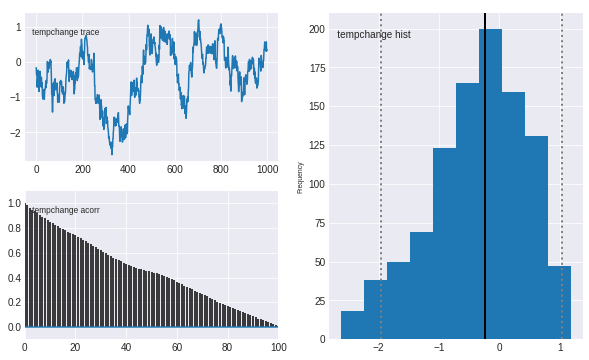

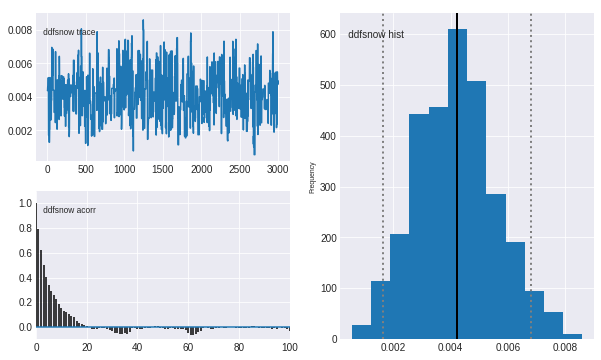

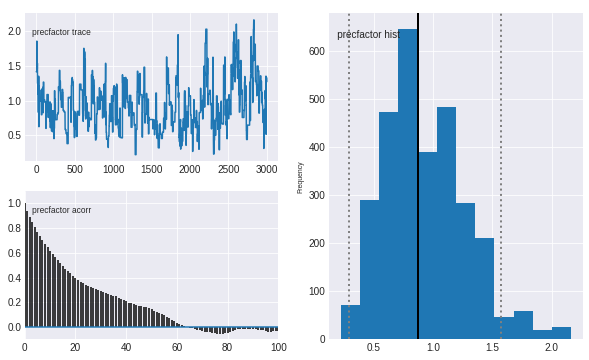

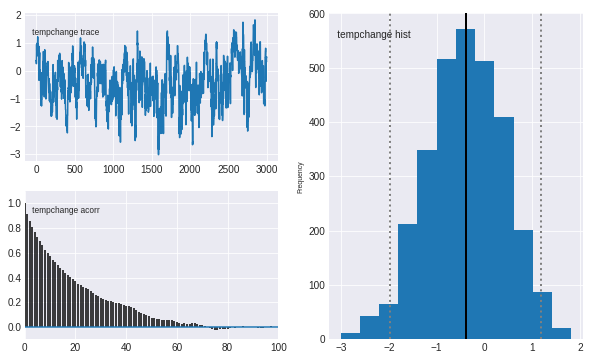

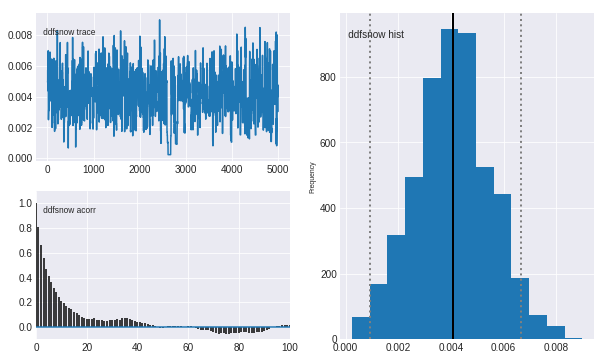

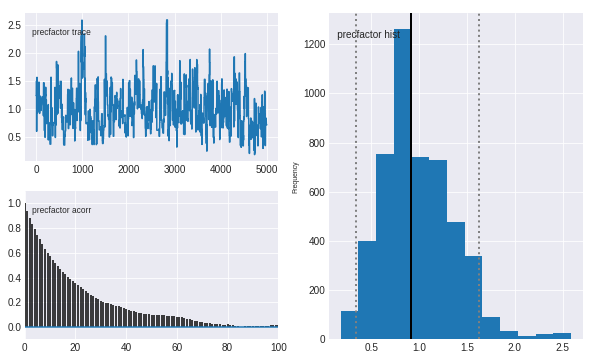

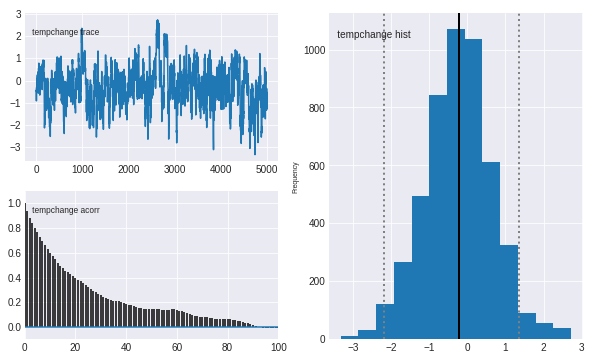

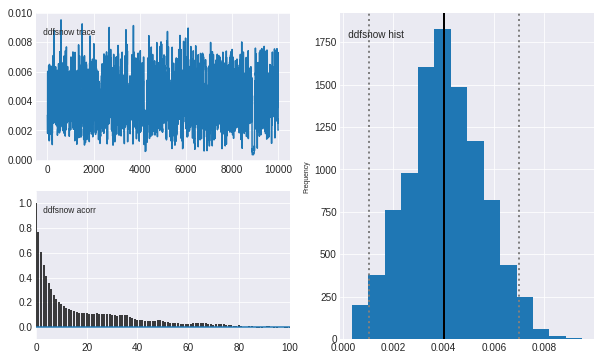

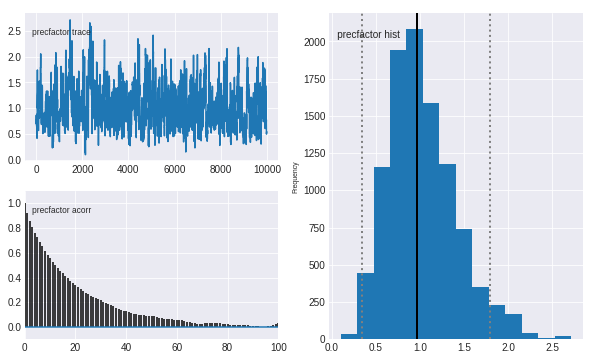

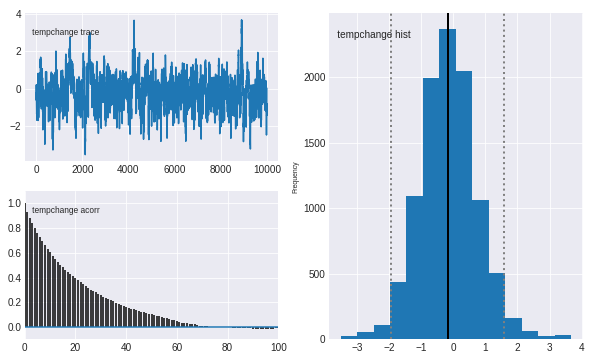

In [47]:
for i in [s1, s3, s5, s10]:
    print(i)
    m = pymc.MCMC(pm, db=i)
    pymc.Matplot.plot(m)

Use the built in raftery lewis method to see what dignostics are for each chain

In [71]:
for i in [s1, s3, s5, s10]:
    print(i)
    m = pymc.MCMC(pm, db=i)
    data = pymc.raftery_lewis(m, q=0.025, r=0.01)
    print(data)



Raftery-Lewis Diagnostic

937 iterations required (assuming independence) to achieve 0.01 accuracy with 95 percent probability.

Thinning factor of 1 required to produce a first-order Markov chain.

68 iterations to be discarded at the beginning of the simulation (burn-in).

23405 subsequent iterations required.

Thinning factor of 9 required to produce an independence chain.

Raftery-Lewis Diagnostic

937 iterations required (assuming independence) to achieve 0.01 accuracy with 95 percent probability.

Thinning factor of 1 required to produce a first-order Markov chain.

42 iterations to be discarded at the beginning of the simulation (burn-in).

12259 subsequent iterations required.

Thinning factor of 8 required to produce an independence chain.

Raftery-Lewis Diagnostic

937 iterations required (assuming independence) to achieve 0.01 accuracy with 95 percent probability.

Thinning factor of 1 required to produce a first-order Markov chain.

39 iterations to be discarded at the beg

In [72]:
for i in [s1, s3, s5, s10]:
    print(i)
    m = pymc.MCMC(pm, db=i)
    data = pymc.gelman_rubin(m)
    print(data)

ValueError: Gelman-Rubin diagnostic requires multiple chains of the same length.

This is a  crude results based 'diagnostic', in which we use the results to run ensembles of mass balance calculations and see how different they are

In [65]:
pymc.raftery_lewis(db, q=0.025, r=0.01)


Raftery-Lewis Diagnostic

937 iterations required (assuming independence) to achieve 0.01 accuracy with 95 percent probability.

Thinning factor of 1 required to produce a first-order Markov chain.

82 iterations to be discarded at the beginning of the simulation (burn-in).

22592 subsequent iterations required.

Thinning factor of 41 required to produce an independence chain.

Raftery-Lewis Diagnostic

937 iterations required (assuming independence) to achieve 0.01 accuracy with 95 percent probability.

Thinning factor of 1 required to produce a first-order Markov chain.

30 iterations to be discarded at the beginning of the simulation (burn-in).

8194 subsequent iterations required.

Thinning factor of 10 required to produce an independence chain.

Raftery-Lewis Diagnostic

937 iterations required (assuming independence) to achieve 0.01 accuracy with 95 percent probability.

Thinning factor of 3 required to produce a first-order Markov chain.

33 iterations to be discarded at the be

{'ddfsnow': (937, 1, 82, 22592, 41),
 'precfactor': (937, 1, 30, 8194, 10),
 'tempchange': (937, 3, 33, 9552, 11),
 'mass_bal': (937, 1, 7, 1865, 4)}

In [61]:
db

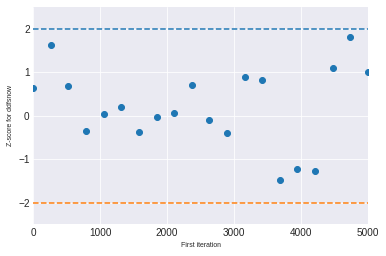

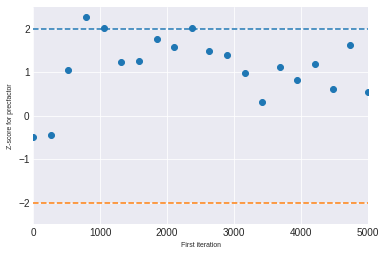

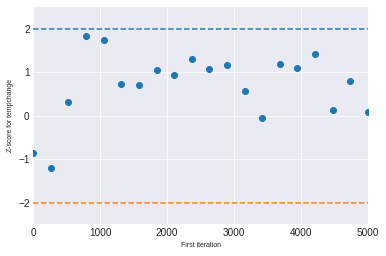

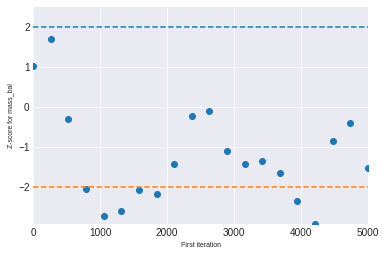

In [60]:
pymc.Matplot.geweke_plot(pymc.geweke(db))

In [59]:
db = pymc.MCMC(pm, db=s10)

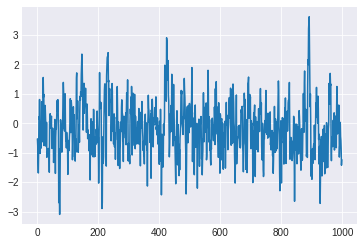

In [52]:
plt.plot(db.trace('tempchange')[::10])

In [19]:
m.sample(10)

 [------------------110%-------------------] 11 of 10 complete in 6.6 sec

In [41]:
m2 = pymc.MCMC(pm, db=s1)

In [43]:
m.variables

{<pymc.PyMCObjects.Deterministic 'mass_bal' at 0x7f68f4fbd978>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'tempchange' at 0x7f68f4fbdf28>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'precfactor' at 0x7f68f3ee34a8>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'obs_massbal' at 0x7f68f4fbdc50>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'ddfsnow' at 0x7f695189c400>}

In [45]:
m2.trace[:]


tempchange:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	-0.358           0.803            0.078            [-1.963  1.037]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-2.171           -0.864          -0.241         0.215         0.898
	


/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
